importing libraries

In [ ]:
#for handling emoticons
!pip install emoji

In [ ]:
pip install num2words

In [ ]:
pip install vaderSentiment

In [ ]:
pip install pyLDAvis

In [ ]:
import json
import csv
from collections import defaultdict
from collections import Counter
import numpy as np
import re
from num2words import num2words
import nltk
import pandas as pd

#for topic modelling
import gensim
from gensim import models
from gensim import corpora
from gensim.models import CoherenceModel

#for plotting
import seaborn as sns
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim  
%matplotlib inline

#for handling emoticons
import emoji

#for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

**Loading data**

In [ ]:
with open('/content/drive/My Drive/Yuvi_RIP.json') as tweets:
  tweet_data = json.load(tweets)

*Storing it as dataframe*

In [ ]:
tweet_data_frame = pd.DataFrame.from_dict(tweet_data)

In [ ]:
tweet_data_frame.shape

(9189, 27)

In [ ]:
tweet_data_frame.columns

Index(['_id', 'created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang'],
      dtype='object')

In [ ]:
tweet_data_frame.head()

,_id,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,{'$oid': '5ee1244dc51e2d8beb570717'},Wed Jun 10 18:19:05 +0000 2020,1270782555357212700,1270782555357212672,RT @PTTVOnlineNews: திமுக எம்எல்ஏ ஜெ.அன்பழகன் ...,False,"[0, 140]","{'hashtags': [{'text': 'JAnbazhagan', 'indices...","{'iso_language_code': 'ta', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1146440916527243300, 'id_str': '1146440...",None,None,None,None,{'created_at': 'Wed Jun 10 06:32:16 +0000 2020...,False,90,0,False,False,ta
1,{'$oid': '5ee1244dc51e2d8beb570718'},Wed Jun 10 18:18:55 +0000 2020,1270782513577963500,1270782513577963525,RT @ShikharDhawan85: @WasimJaffer14 @virenders...,False,"[0, 107]","{'hashtags': [{'text': 'TeamIndia', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 2939301529, 'id_str': '2939301529', 'na...",None,None,None,None,{'created_at': 'Wed Jun 10 12:10:56 +0000 2020...,False,1,0,False,False,en
2,{'$oid': '5ee1244dc51e2d8beb570719'},Wed Jun 10 18:18:43 +0000 2020,1270782461304164400,1270782461304164352,"RT @TheCricketWire: #OnThisDay last year, Yuvr...",False,"[0, 140]","{'hashtags': [{'text': 'OnThisDay', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1256605147355988000, 'id_str': '1256605...",None,None,None,None,{'created_at': 'Wed Jun 10 10:26:06 +0000 2020...,False,36,0,False,False,en
3,{'$oid': '5ee1244dc51e2d8beb57071a'},Wed Jun 10 18:18:41 +0000 2020,1270782454454837200,1270782454454837248,RT @Sra1karne: We are at 5th place in Trending...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 464766558, 'id_str': '464766558', 'name...",None,None,None,None,{'created_at': 'Wed Jun 10 06:25:26 +0000 2020...,False,4,0,False,False,en
4,{'$oid': '5ee1244dc51e2d8beb57071b'},Wed Jun 10 18:18:34 +0000 2020,1270782423538647000,1270782423538647040,RT @fadnavis_amruta: He was out on streets of ...,False,"[0, 144]","{'hashtags': [{'text': 'Dharavi', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1850478770, 'id_str': '1850478770', 'na...",None,None,None,None,{'created_at': 'Wed Jun 10 08:00:34 +0000 2020...,False,269,0,False,False,en


**Separating the tweets into different classes**

In [ ]:
df_A = pd.DataFrame()                       #dataframe that stores tweets of class A
df_B = pd.DataFrame()                       #dataframe that stores tweets of class B
df_C = pd.DataFrame()                       #dataframe that stores tweets of class C


for i in range(len(tweet_data_frame)):
  text = tweet_data_frame.loc[i,'full_text']

  if("#MissYouYuvi" in text and "#RestInPeace" not in text):
    df_A = df_A.append(tweet_data_frame.loc[[i]])
  elif("#RestInPeace" in text and "#MissYouYuvi" not in text):
    df_B = df_B.append(tweet_data_frame.loc[[i]])
  elif("#RestInPeace" in text and "#MissYouYuvi" in text):
    df_C = df_C.append(tweet_data_frame.loc[[i]])

####**Analysing the data fetched**

In [ ]:
print("Size of class A = ",len(df_A.index))
print("Size of class B = ",len(df_B.index))
print("Size of class C = ",len(df_C.index))

Size of class A =  5665
Size of class B =  416
Size of class C =  269


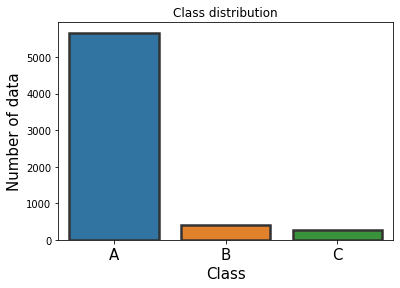

In [ ]:
class_name = ['A','B','C']
count = [len(df_A.index),len(df_B.index),len(df_C.index)]

index = np.arange(len(class_name))

sns.barplot(x=class_name, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Class distribution')
plt.show()

**Number of users in each class**

*Class A*

In [ ]:
users_A = []

for i in df_A.index:
  users_A.append(df_A.loc[i,'user']['id_str'])

In [ ]:
print("Tweets for class A: ", len(users_A))
print("Number of users tweeting for class A :", len(set(users_A)))

Tweets for class A:  5665
Number of users tweeting for class A : 1617


*Class B*

In [ ]:
users_B = []

for i in df_B.index:
  users_B.append(df_B.loc[i,'user']['id_str'])

In [ ]:
print("Tweets for class B: ", len(users_B))
print("Number of users tweeting for class B :", len(set(users_B)))

Tweets for class B:  416
Number of users tweeting for class B : 381


*Class C*

In [ ]:
users_C = []

for i in df_C.index:
  users_C.append(df_C.loc[i,'user']['id_str'])

In [ ]:
print("Tweets for class C: ", len(users_C))
print("Number of users tweeting for class C :", len(set(users_C)))

Tweets for class C:  269
Number of users tweeting for class C : 197


**Number of verified users in each class**

In [ ]:
count_A = 0

for i in df_A.index:
  if(df_A.loc[i,'user']['verified'] == True):
    count_A +=1

print("Number of verified users in class A = ", count_A)
print("Number of non-verified users in class A = ",len(set(users_A))-count_A)

Number of verified users in class A =  34
Number of non-verified users in class A =  1583


*Class B*

In [ ]:
count_B = 0

for i in df_B.index:
  if(df_B.loc[i,'user']['verified'] == True):
    count_B +=1

print("Number of verified users in class B = ", count_B)
print("Number of non-verified users in class B = ",len(set(users_B))-count_B)

Number of verified users in class B =  6
Number of non-verified users in class B =  375


*Class C*

In [ ]:
count_C = 0

for i in df_C.index:
  if(df_C.loc[i,'user']['verified'] == True):
    count_C +=1

print("Number of verified users in class C = ", count_C)
print("Number of non-verified users in class C = ",len(set(users_C))-count_C)

Number of verified users in class C =  0
Number of non-verified users in class C =  197


**Number of hashtags vs timeline**

In [ ]:
time_A = defaultdict(lambda:0)

for i in df_A.index:
  date_time = df_A.loc[i,'created_at']
  time = date_time.split('Wed Jun 10')[1].strip()
  hour = time.split(":")[0]
  time_A[hour] +=1

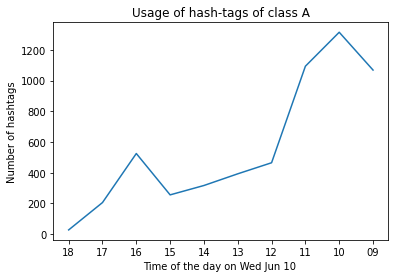

In [ ]:
plt.plot(list(time_A.keys()), list(time_A.values()))
plt.xlabel('Time of the day on Wed Jun 10 ') 
plt.ylabel('Number of hashtags')
plt.title("Usage of hash-tags of class A")
plt.show()

In [ ]:
time_B = defaultdict(lambda:0)

for i in df_B.index:
  date_time = df_B.loc[i,'created_at']
  time = date_time.split('Wed Jun 10')[1].strip()
  hour = time.split(":")[0]
  time_B[hour] +=1

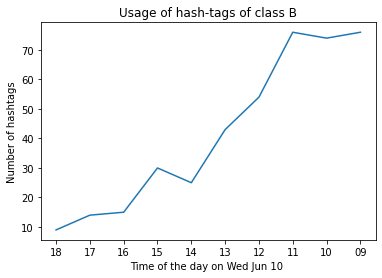

In [ ]:
plt.plot(list(time_B.keys()), list(time_B.values()))
plt.xlabel('Time of the day on Wed Jun 10 ') 
plt.ylabel('Number of hashtags')
plt.title("Usage of hash-tags of class B")
plt.show()

In [ ]:
time_C = defaultdict(lambda:0)

for i in df_C.index:
  date_time = df_C.loc[i,'created_at']
  time = date_time.split('Wed Jun 10')[1].strip()
  hour = time.split(":")[0]
  time_C[hour] +=1

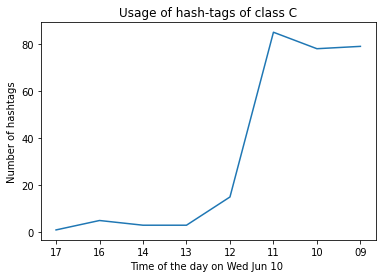

In [ ]:
plt.plot(list(time_C.keys()), list(time_C.values()))
plt.xlabel('Time of the day on Wed Jun 10 ') 
plt.ylabel('Number of hashtags')
plt.title("Usage of hash-tags of class C")
plt.show()

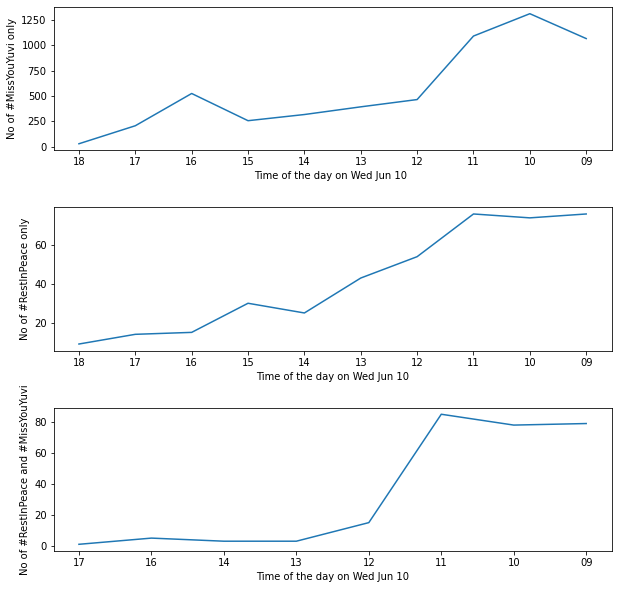

In [ ]:
f, axs = plt.subplots(3,2,figsize=(10,10))

plt.subplot(311)
plt.plot(list(time_A.keys()), list(time_A.values()))
plt.ylabel("No of #MissYouYuvi only")
plt.xlabel("Time of the day on Wed Jun 10 ")

plt.subplot(312)
plt.plot(list(time_B.keys()), list(time_B.values()))
plt.ylabel("No of #RestInPeace only")
plt.xlabel("Time of the day on Wed Jun 10")

plt.subplot(313)
plt.plot(list(time_C.keys()), list(time_C.values()))
plt.ylabel("No of #RestInPeace and #MissYouYuvi")
plt.xlabel("Time of the day on Wed Jun 10")

f.subplots_adjust(hspace=0.4)
plt.show()

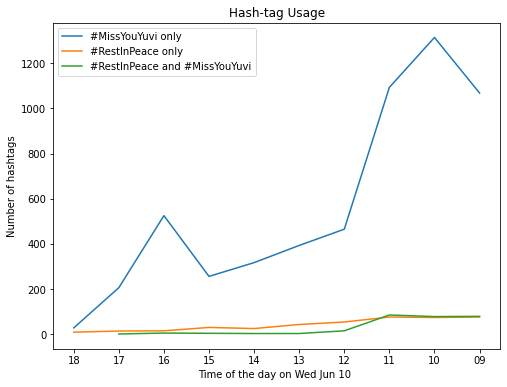

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(list(time_A.keys()), list(time_A.values()), label = "#MissYouYuvi only")  
plt.plot(list(time_B.keys()), list(time_B.values()), label = "#RestInPeace only")  
plt.plot(list(time_C.keys()), list(time_C.values()), label = "#RestInPeace and #MissYouYuvi")  
  
plt.xlabel('Time of the day on Wed Jun 10 ') 

plt.ylabel('Number of hashtags') 

plt.title('Hash-tag Usage')
plt.legend()
plt.show() 

####**Preparing the data for processing**

**Data pre-processing**

In [ ]:
def remove_hashtag(sent):
  sent = re.sub(r'(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)','',sent)
  return sent

In [ ]:
def remove_links(text):
  text = re.sub(r'(\w+:\/\/\S+)','',text)
  
  return text

In [ ]:
def remove_specialChars(text):
  text = (re.sub(r'[\.•,;:?!#=+$%^&*_~><\-\(\)\{\}\[\]\"\'\|\/]','',text)).replace('RT','')
  
  # changing to lower case
  text = text.lower()
  return text

In [ ]:
def replace_emoji(text):
  text = emoji.demojize(text)
  text = text.replace(":"," ")
  tweet = ' '.join(text.split())

  return tweet

In [ ]:
def numberTowords(tweet):

  final_tweet = []

  for word in tweet:
    if(word.isnumeric()):
      final_tweet.append(num2words(word))
    else:
      final_tweet.append(word)
  
  return final_tweet

In [ ]:
# function to handle negative contractions

def handle_negation(text):
  text = re.sub(r'(\w+)n\'t', '\g<1> not',text)
  return text

**Tokenise and Lemmatise**

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def tokenise(line):
  lem_words = []

  tokens = line.split()

  for j in tokens:
    lem_words.append(lm.lemmatize(j))
    
  return lem_words

**Preparing data for analysis**

In [ ]:
def get_tweets(df):
  cleaned_tweets = []
  vocab = set()

  tokens_dict = defaultdict(list)                           # dictionary that stores tokens of each tweet
  wd_count = defaultdict(lambda:defaultdict(lambda:0))      # dictionary that stores count(term,tweet) i.e. tf
  w_count = defaultdict(lambda:0)                           # dictionary that stores df(term)

  for i in df.index:
    text = df.loc[i,'full_text']

    #cleaning the tweets
    h_tweet = remove_hashtag(text)
    l_tweet = remove_links(h_tweet)
    demoji = replace_emoji(l_tweet)
    n_tweet = handle_negation(demoji)
    clean_tweet = remove_specialChars(n_tweet)

    #generate tokens
    tokens = tokenise(clean_tweet)

    # final = numberTowords(tokens)
    # print(final)
    
    cleaned_tweets.append(tokens)

  return cleaned_tweets

In [ ]:
tweets_A = get_tweets(df_A)

In [ ]:
tweets_B = get_tweets(df_B)

In [ ]:
tweets_C = get_tweets(df_C)

####**Topic Modelling using LDA**

In [ ]:
def build_corpus(final_tweet):
  dictionary = corpora.Dictionary()

  BoW_corpus = [dictionary.doc2bow(sent, allow_update=True) for sent in final_tweet]
  dictionary = gensim.corpora.Dictionary(final_tweet)

  tfidf = models.TfidfModel(BoW_corpus)
  corpus_tfidf = tfidf[BoW_corpus]

  return corpus_tfidf,dictionary

In [ ]:
BoW_A,dict_A = build_corpus(tweets_A)
BoW_B,dict_B = build_corpus(tweets_B)
BoW_C,dict_C = build_corpus(tweets_C)

In [ ]:
def find_topics(corpus_tfidf,dictionary,num):

  lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num, id2word=dictionary, passes=2, workers=4)

  return lda_model_tfidf

In [ ]:
def show_topics(model,corpus,dictionary):
  for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

**For Class A (#MissYouYuvi only)**

In [ ]:
#perform topic modelling
topics = 15
model_A = find_topics(BoW_A,dict_A,topics)

In [ ]:
show_topics(model_A,BoW_A,dict_A)

Topic: 0 Word: 0.009*"a" + 0.007*"jersey" + 0.007*"you" + 0.007*"no" + 0.006*"12" + 0.006*"fire" + 0.006*"this" + 0.006*"to" + 0.006*"cricketgame" + 0.005*"of"
Topic: 1 Word: 0.023*"heartsuit" + 0.015*"foldedhands" + 0.012*"a" + 0.011*"we" + 0.011*"you" + 0.010*"sir" + 0.010*"miss" + 0.008*"u" + 0.008*"yuvian" + 0.008*"the"
Topic: 2 Word: 0.048*"redheart" + 0.013*"yuvi" + 0.012*"no" + 0.010*"yuvian" + 0.010*"love" + 0.009*"you" + 0.008*"like" + 0.007*"longer" + 0.007*"nd" + 0.007*"we"
Topic: 3 Word: 0.017*"fire" + 0.012*"you" + 0.012*"the" + 0.010*"yuvi" + 0.010*"pensiveface" + 0.010*"miss" + 0.010*"is" + 0.009*"love" + 0.009*"of" + 0.008*"when"
Topic: 4 Word: 0.014*"in" + 0.013*"you" + 0.009*"will" + 0.009*"year" + 0.009*"heart" + 0.009*"our" + 0.008*"completed" + 0.008*"of" + 0.008*"never" + 0.008*"speed"
Topic: 5 Word: 0.022*"are" + 0.019*"always" + 0.015*"you" + 0.014*"yuvi" + 0.012*"phase" + 0.012*"with" + 0.011*"a" + 0.011*"the" + 0.010*"we" + 0.009*"in"
Topic: 6 Word: 0.017*"sta

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_A, BoW_A, dict_A)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5     -0.039562  0.025133       1        1  9.903667
14    -0.026748  0.019972       2        1  8.657323
9     -0.016299  0.037266       3        1  8.575480
11    -0.009027 -0.113418       4        1  6.854165
3      0.075172  0.057816       5        1  6.731419
12     0.050093  0.061636       6        1  6.716328
13     0.011003  0.021330       7        1  6.715363
8     -0.034951 -0.032719       8        1  6.461961
10    -0.074310  0.027150       9        1  6.376820
1     -0.024167  0.017056      10        1  6.168150
4     -0.036574  0.004296      11        1  5.890129
2      0.127714 -0.040808      12        1  5.841338
7     -0.020782 -0.014404      13        1  5.786773
0     -0.000886 -0.057304      14        1  4.901534
6      0.019325 -0.013004      15        1  4.419557, topic_info=            Term        Freq       Total Category  logprob  loglift
86      redheart  118.000000  118.000000  Default  30.0000  30.0000
287  brokenheart   51.000000   51.000000  Default  29.0000  29.0000
429    collision   43.000000   43.000000  Default  28.0000  28.0000
237         fire   74.000000   74.000000  Default  27.0000  27.0000
281          tag   26.000000   26.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
394        speed    2.352716   37.581905  Topic15  -5.5718   0.3482
119       always    2.472739   78.709114  Topic15  -5.5221  -0.3413
9            are    2.432671   87.970978  Topic15  -5.5384  -0.4689
662            1    2.327497   36.199780  Topic15  -5.5826   0.3749
200         this    2.314790   55.551205  Topic15  -5.5881  -0.0589

[1020 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1103      2  0.120974   0f
1103      3  0.120974   0f
1103      6  0.120974   0f
1103     13  0.483895   0f
662       1  0.082873    1
...     ...       ...  ...
138      13  0.103814    …
138      14  0.025954    …
138      15  0.051907    …
3238      8  0.217009    ♡
3238     15  0.217009    ♡

[2908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 15, 10, 12, 4, 13, 14, 9, 11, 2, 5, 3, 8, 1, 7])

**For Class B (#RestInPeace only)**

In [ ]:
topics = 8
model_B = find_topics(BoW_B,dict_B,topics)

In [ ]:
show_topics(model_B,BoW_B,dict_B)

Topic: 0 Word: 0.006*"campaign" + 0.006*"govt" + 0.006*"school" + 0.006*"covid" + 0.006*"class" + 0.006*"19" + 0.006*"10th" + 0.005*"…" + 0.005*"ஜெஅன்பழகன்" + 0.004*"in"
Topic: 1 Word: 0.007*"…" + 0.006*"அடக்கம்" + 0.006*"செய்யப்பட்டது" + 0.005*"உடல்" + 0.005*"முதல்வர்" + 0.005*"எமஎல்ஏ" + 0.005*"பினராயி" + 0.005*"கேரள" + 0.005*"grinningfacewithsweat" + 0.005*"dhak"
Topic: 2 Word: 0.006*"to" + 0.006*"and" + 0.005*"பொருளாளர்" + 0.005*"துரைமுருகன்" + 0.005*"the" + 0.005*"loudlycryingface" + 0.005*"such" + 0.004*"ஜெஅன்பழகன்" + 0.004*"a" + 0.004*"their"
Topic: 3 Word: 0.049*"ht…" + 0.048*"சீமான்" + 0.046*"எம்எல்ஏ" + 0.045*"மறைவுக்கு" + 0.045*"இரங்கல்" + 0.042*"திமுக" + 0.038*"ஜெஅன்பழகன்" + 0.003*"yes" + 0.003*"his" + 0.003*"are"
Topic: 4 Word: 0.016*"rip" + 0.016*"foldedhands" + 0.015*"bouquet" + 0.014*"may" + 0.012*"he" + 0.007*"இரங்கல்" + 0.007*"திமுக" + 0.007*"மறைவுக்கு" + 0.007*"எம்எல்ஏ" + 0.007*"ஜெஅன்பழகன்"
Topic: 5 Word: 0.005*"and" + 0.005*"the" + 0.004*"whitemediumstar" + 0.004*"spa

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_B, BoW_B, dict_B)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.134622  0.009175       1        1  21.216084
6      0.032973  0.075481       2        1  13.488091
2      0.014799 -0.013820       3        1  12.485683
0      0.011534  0.011198       4        1  12.383230
4     -0.018344 -0.028255       5        1  10.850070
1      0.028015 -0.021403       6        1  10.459812
7      0.036739 -0.020573       7        1  10.275393
5      0.028905 -0.011803       8        1   8.841636, topic_info=          Term       Freq      Total Category  logprob  loglift
3       சீமான்  14.000000  14.000000  Default  30.0000  30.0000
0          ht…  14.000000  14.000000  Default  29.0000  29.0000
2      எம்எல்ஏ  14.000000  14.000000  Default  28.0000  28.0000
1      இரங்கல்  14.000000  14.000000  Default  27.0000  27.0000
6    மறைவுக்கு  14.000000  14.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
31          in   0.341617   2.714607   Topic8  -5.7428   0.3530
138         wa   0.307724   2.128980   Topic8  -5.8473   0.4915
114         of   0.286410   2.446879   Topic8  -5.9191   0.2806
470      after   0.273404   1.435385   Topic8  -5.9656   0.7675
157        his   0.271327   1.890675   Topic8  -5.9732   0.4843

[421 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
848       4  0.605555        10th
515       4  0.484526          19
7         2  0.324174           a
7         3  0.324174           a
7         5  0.324174           a
...     ...       ...         ...
400       4  0.931431  வீட்டிற்கு
726       7  0.844951  வீரவணக்கம்
127       2  0.264245           …
127       4  0.264245           …
127       6  0.264245           …

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 3, 1, 5, 2, 8, 6])

**For Class C (Both #RestInPeace and #MissYouYuvi)**

In [ ]:
topics = 8
model_C = find_topics(BoW_C,dict_C,topics)

In [ ]:
show_topics(model_C,BoW_C,dict_C)

Topic: 0 Word: 0.018*"be" + 0.016*"on" + 0.014*"like" + 0.013*"i" + 0.012*"fan" + 0.012*"and" + 0.012*"to" + 0.011*"twitter" + 0.010*"facewithrollingeyes" + 0.009*"top"
Topic: 1 Word: 0.018*"heart" + 0.017*"…" + 0.016*"my" + 0.013*"stopped" + 0.011*"omg" + 0.011*"seenoevilmonkey" + 0.011*"ge" + 0.011*"bai" + 0.010*"a" + 0.010*"and"
Topic: 2 Word: 0.015*"stuart" + 0.015*"broad" + 0.015*"i" + 0.015*"together" + 0.014*"they" + 0.014*"le" + 0.013*"watching" + 0.013*"in" + 0.011*"when" + 0.011*"and"
Topic: 3 Word: 0.012*"the" + 0.010*"scared" + 0.010*"hell" + 0.009*"me" + 0.009*"are" + 0.009*"out" + 0.009*"time" + 0.008*"yuvraj" + 0.008*"at" + 0.008*"same"
Topic: 4 Word: 0.015*"cacsexa…" + 0.011*"rollingonthefloorlaughing" + 0.007*"hashtag" + 0.006*"𝙎𝙞𝙣𝙜𝙝" + 0.006*"𝙡𝙞𝙠𝙚" + 0.006*"𝙗𝙚" + 0.006*"kawaii" + 0.006*"𝙛𝙖𝙣𝙨" + 0.006*"𝙔𝙪𝙫𝙧𝙖𝙟" + 0.006*"fuck"
Topic: 5 Word: 0.045*"जननायकछात्रों…" + 0.028*"singh" + 0.027*"seeing" + 0.027*"yuvraj" + 0.025*"after" + 0.023*"together" + 0.016*"writing" + 0.0

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_C, BoW_C, dict_C)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.159386 -0.015593       1        1  21.481840
7     -0.044442 -0.131947       2        1  18.268526
5     -0.093433  0.027051       3        1  12.654514
2      0.003642  0.044027       4        1  11.269789
1     -0.018690  0.042025       5        1  10.539447
0     -0.006634  0.014585       6        1  10.428085
3      0.003922 -0.007136       7        1   8.794520
4     -0.003751  0.026988       8        1   6.563277, topic_info=               Term      Freq     Total Category  logprob  loglift
186  जननायकछात्रों…  5.000000  5.000000  Default  30.0000  30.0000
103            fuck  9.000000  9.000000  Default  29.0000  29.0000
90           scared  9.000000  9.000000  Default  28.0000  28.0000
77           moment  9.000000  9.000000  Default  27.0000  27.0000
51            every  9.000000  9.000000  Default  26.0000  26.0000
..              ...       ...       ...      ...      ...      ...
53           joking  0.248968  9.552759   Topic8  -5.3357  -0.9236
54               rn  0.248973  9.787193   Topic8  -5.3357  -0.9478
51            every  0.246361  9.915074   Topic8  -5.3462  -0.9713
49              amp  0.243555  9.433722   Topic8  -5.3577  -0.9330
52           indian  0.241381  9.929102   Topic8  -5.3666  -0.9932

[414 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
37        4  0.603975            2020
74        1  0.104911               a
74        2  0.629468               a
74        3  0.104911               a
74        5  0.104911               a
...     ...       ...             ...
582       2  0.682202       yuzvendra
186       3  0.789947  जननायकछात्रों…
35        2  0.808808              है
73        1  0.352588               …
73        5  0.352588               …

[225 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 6, 3, 2, 1, 4, 5])

**Analysing sentiments of each class**

In [ ]:
def detect_sentiment(sentence): 
    senti = SentimentIntensityAnalyzer() 
    sentiment_score = senti.polarity_scores(sentence) 
      
    print("Sentiment scores are: ", sentiment_score) 

    if sentiment_score['compound'] <= - 0.05 :
      sentiment = "Negative"
      return sentiment

    elif sentiment_score['compound'] >= 0.05:
      sentiment = "Positive"
      return sentiment
        
    else : 
      sentiment = "Neutral"
      return sentiment


In [ ]:
def class_sentiment(model,dictionary,num_topics):
  # find the most significant words in each topic(here I've taken top 5 words)
  topic_words = []

  for i in range(num_topics):
    #considering top 5 words from each topic for sentiment analysis
    tt = model_A.get_topic_terms(i,5)
    topic_words.append([dict_A[pair[0]] for pair in tt])


  # Detect the sentiment of each topic
  j = 0
  for topic in topic_words:
    #making sentence from the top 5 words for each topic
    sentence = ' '.join(map(str, topic)) 
    print("For topic ",j,":")
    j+=1
    print("Topic Overall Rated As",detect_sentiment(sentence))

**for class A**

In [ ]:
class_sentiment(model_A,dict_A,15)

For topic  0 :
Sentiment scores are:  {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
Topic Overall Rated As Negative
For topic  1 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  2 :
Sentiment scores are:  {'neg': 0.65, 'neu': 0.35, 'pos': 0.0, 'compound': -0.6776}
Topic Overall Rated As Negative
For topic  3 :
Sentiment scores are:  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
Topic Overall Rated As Negative
For topic  4 :
Sentiment scores are:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Topic Overall Rated As Positive
For topic  5 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  6 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  7 :
Sentiment scores are:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}
Topic Ove



> The most dominant sentiment in the class is **Neutral**. So, class A has **Neutral sentiment**.



**for class B**

In [ ]:
class_sentiment(model_B,dict_B,8)

For topic  0 :
Sentiment scores are:  {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
Topic Overall Rated As Negative
For topic  1 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  2 :
Sentiment scores are:  {'neg': 0.65, 'neu': 0.35, 'pos': 0.0, 'compound': -0.6776}
Topic Overall Rated As Negative
For topic  3 :
Sentiment scores are:  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
Topic Overall Rated As Negative
For topic  4 :
Sentiment scores are:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Topic Overall Rated As Positive
For topic  5 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  6 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  7 :
Sentiment scores are:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}
Topic Ove



> The most dominant sentiment in the class is **Negative**. So, class B has **negative sentiment**.






**for class C**

In [ ]:
class_sentiment(model_C,dict_C,8)

For topic  0 :
Sentiment scores are:  {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
Topic Overall Rated As Negative
For topic  1 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  2 :
Sentiment scores are:  {'neg': 0.65, 'neu': 0.35, 'pos': 0.0, 'compound': -0.6776}
Topic Overall Rated As Negative
For topic  3 :
Sentiment scores are:  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
Topic Overall Rated As Negative
For topic  4 :
Sentiment scores are:  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Topic Overall Rated As Positive
For topic  5 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  6 :
Sentiment scores are:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Topic Overall Rated As Neutral
For topic  7 :
Sentiment scores are:  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}
Topic Ove



> The most dominant sentiment in the class is **Negative**. So, class C has **negative sentiment**.



**Number of deaths (loaction-wise)**

In [ ]:
df_B

,_id,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,{'$oid': '5ee1244dc51e2d8beb570717'},Wed Jun 10 18:19:05 +0000 2020,1270782555357212700,1270782555357212672,RT @PTTVOnlineNews: திமுக எம்எல்ஏ ஜெ.அன்பழகன் ...,False,"[0, 140]","{'hashtags': [{'text': 'JAnbazhagan', 'indices...","{'iso_language_code': 'ta', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1146440916527243300, 'id_str': '1146440...",None,None,None,None,{'created_at': 'Wed Jun 10 06:32:16 +0000 2020...,False,90,0,False,False,ta
10,{'$oid': '5ee1244dc51e2d8beb570721'},Wed Jun 10 18:17:40 +0000 2020,1270782198824788000,1270782198824787977,"Virtual funerals are becoming more common, as ...",False,"[0, 270]","{'hashtags': [{'text': 'RestInPeace', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1209427513136562200, 'id_str': '1209427...",None,None,None,None,NaN,False,0,0,False,False,en
18,{'$oid': '5ee1244dc51e2d8beb570729'},Wed Jun 10 18:15:27 +0000 2020,1270781638583042000,1270781638583042048,😭😭\n\n#RestInPeace https://t.co/N3Qm59QSjz,False,"[0, 16]","{'hashtags': [{'text': 'RestInPeace', 'indices...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1112792532545466400, 'id_str': '1112792...",None,None,None,None,NaN,True,0,0,False,False,und
29,{'$oid': '5ee1244dc51e2d8beb570734'},Wed Jun 10 18:12:53 +0000 2020,1270780994518474800,1270780994518474753,"Rest in peace, George Floyd\nWe Will Not Forge...",False,"[0, 173]","{'hashtags': [{'text': 'RIPGeorgeFloyd', 'indi...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1254525094937985000, 'id_str': '1254525...",None,None,None,None,NaN,False,0,0,False,False,en
34,{'$oid': '5ee1244dc51e2d8beb570739'},Wed Jun 10 18:11:10 +0000 2020,1270780563331453000,1270780563331452929,RT @nehaa_sinha: And two firefighters have los...,False,"[0, 137]","{'hashtags': [{'text': 'RestInPeace', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 2784446966, 'id_str': '2784446966', 'na...",None,None,None,None,{'created_at': 'Wed Jun 10 07:37:39 +0000 2020...,False,7,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9050,{'$oid': '5ee125dcc51e2d8beb572a71'},Wed Jun 10 09:05:47 +0000 2020,1270643310009278500,1270643310009278464,@ANI @rsprasad He's just an MP like any other ...,False,"[5, 293]","{'hashtags': [{'text': 'karachi', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.270628e+18,1270627935351762944,355989081.0,355989081,ANI,"{'id': 1233066191389782000, 'id_str': '1233066...",None,None,None,None,NaN,False,0,0,False,False,en
9070,{'$oid': '5ee125dcc51e2d8beb572a85'},Wed Jun 10 09:05:09 +0000 2020,1270643152593064000,1270643152593063936,RT @itsvjdmk: #JAnbazhagan\n#RestInPeace\n#RIP...,False,"[0, 90]","{'hashtags': [{'text': 'JAnbazhagan', 'indices...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1007808431908982800, 'id_str': '1007808...",None,None,None,None,{'created_at': 'Wed Jun 10 08:39:15 +0000 2020...,False,1,0,False,False,und
9117,{'$oid': '5ee125e0c51e2d8beb572ab4'},Wed Jun 10 09:04:18 +0000 2020,1270642938494832600,1270642938494832642,#JAnbazhagan \n#RestInPeace https://t.co/KP5

In [ ]:
locations = []
for i in df_B.index:
  locations.append(df_B.loc[i,'user']['location'])
  print(df_B.loc[i,'user']['location'])


Charlotte, NC
Andhra Pradesh, India
مصر
Switzerland


England UK 
Kailua-Kona, HI
Currently on planet Earth
Hubli, India
Global
Hardoi, India
Venezuela
Johannesburg, South Africa

Orl
Madurai
Dubai, United Arab Emirates

PNW
செக்காணூரணி, மதுரை
New Delhi
13 SummerSt, Rivonia, Sandton 
Somewhere Quiet
Tamil Nadu, India
Eldoret
Somewhere Nowhere
Singapore
United States
Chidambaram
Marion, North Carolina
world
PDX☔️{in}TheUK☔️{daydreaming}

california,usa
Tamil Nadu, India
Denver, Colorado

Ramanathapuram 


Nationwide


New York, USA
Coimbatore, India

United States

India


Singapore
Guwahati, India
Singapore
Coimbatore, Tamilnadu
Lovely Earth
chennai
Nairobi, Kenya
ছিপাঝাৰ 




Southern California
Tamil Nadu, India
தல( தமிழ்)நாடு
contact@vindylee.com
MikeBoneMedia.com
India

Nairobi, Kenya
India

தஞ்சாவூர்

Johannesburg, South Africa
India
Chennai

West Virginia,USA
Maharashtra, India
East Bum F!#@, CT
Chicago, IL
Chennai, India
Salem, India
Albuquerque, NM
மதுரை TamilNadu 
HONG KONG
N

In [ ]:
Counter(locations)

Counter({'': 119,
         ' Thiruthani,Thamizhnadu,India': 1,
         '#LuchaKliq': 1,
         '13 SummerSt, Rivonia, Sandton ': 1,
         'AIFF Football House, New Delhi': 1,
         'AKHAND BHARAT🚩': 1,
         'Al Jahra, Kuwait': 1,
         'Albuquerque, NM': 1,
         'Allagadda, India': 1,
         'Andhra Pradesh, India': 1,
         'Ariyalur, India': 1,
         'Assam, India': 2,
         'Auckland, New Zealand': 1,
         'Bangalore': 3,
         'Bengaluru, India': 3,
         'Bharat': 2,
         'Bhopal': 1,
         'Bihar, India': 2,
         'Burundi': 1,
         'CNP,dindigul dist.TAMIL NADU': 1,
         'Calcutta, India': 1,
         'Calicut': 1,
         'Central Region, Singapore': 1,
         'Charlotte, NC': 1,
         'Chengalpattu, India': 1,
         'Chennai': 6,
         'Chennai ': 1,
         'Chennai india': 1,
         'Chennai, India': 15,
         'Chennai, Tamilnadu': 1,
         'Chennai/Bengaluru': 1,
         'Chicago, IL': 1,
     